In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [4]:
# Load Dataset
df = pd.read_csv("TASK-ML-INTERN.csv")
# drop id column as it is not necessary
df.drop('hsi_id',axis=1,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [5]:
df.shape

(500, 449)

In [6]:
# Check for missing values
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
444,0
445,0
446,0
447,0


In [7]:
# drop rows if any null element
# if it has null use imputer(better option)
df.dropna(inplace=True)
df.shape

(500, 449)

In [8]:
target = "vomitoxin_ppb"
X = df.drop(columns=[target])
y = df[target]

# normalize using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape,y.shape

((500, 448), (500,))

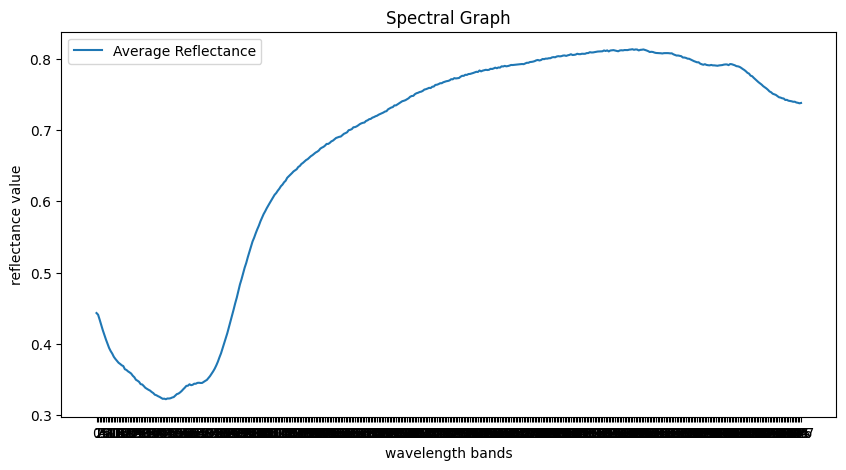

In [9]:
# visualize data
plt.figure(figsize=(10, 5))
plt.plot(X.columns, X.mean(), label='Average Reflectance')
plt.xlabel("wavelength bands")
plt.ylabel("reflectance value")
plt.legend()
plt.title("Spectral Graph")
plt.show()

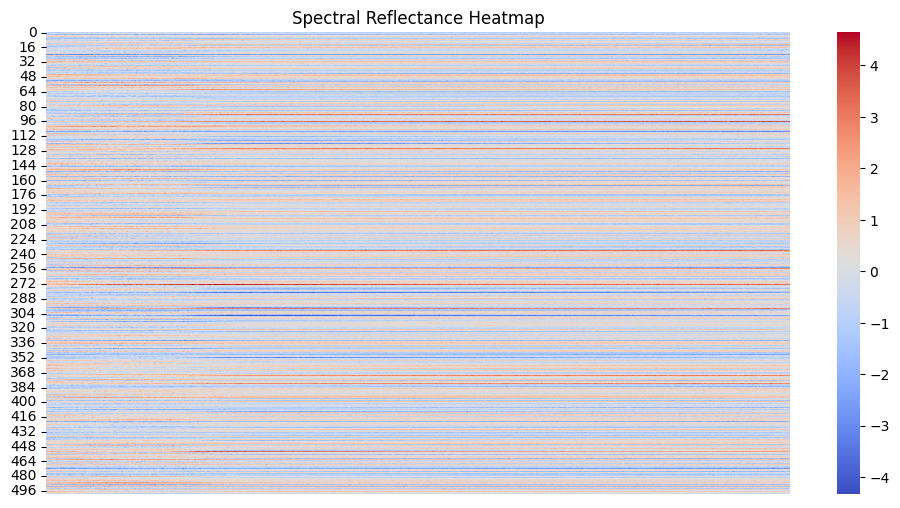

In [54]:
# Heatmap of spectral data
plt.figure(figsize=(12, 6))
sns.heatmap(X_scaled, cmap='coolwarm', xticklabels=False)
plt.title("Spectral Reflectance Heatmap")
plt.show()

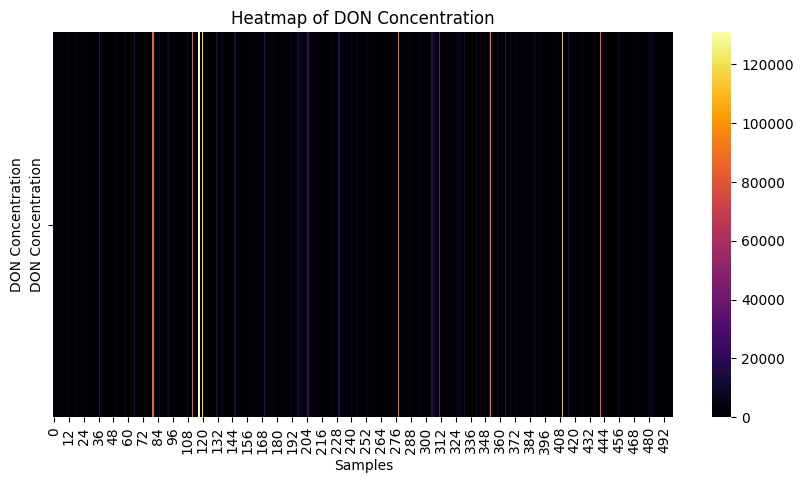

In [56]:
# Heatmap for DON Concentration
df_concentration = pd.DataFrame({'Sample Index': range(len(y)), 'DON Concentration': y})
plt.figure(figsize=(10, 5))
sns.heatmap(df_concentration.set_index('Sample Index').T, cmap='inferno', cbar=True)
plt.title("Heatmap of DON Concentration")
plt.xlabel("Samples")
plt.ylabel("DON Concentration")
plt.show()

In [10]:
# reduce dimention using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# data converted from (500,448 ) to (500,2)
X_pca.shape

(500, 2)

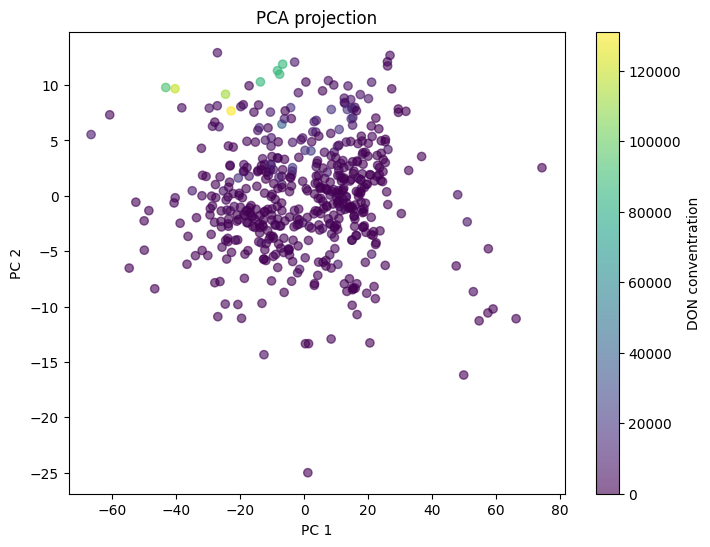

In [11]:
# PCA visualization

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.colorbar(label="DON conventration")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA projection")
plt.show()

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# random forest model train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

# random forest evaluation
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean absolute Error: {mse}")
print(f"R-squared Score: {r2}")


Mean absolute Error: 3765.0568
R-squared Score: 0.5282211884116356


In [13]:
# XGBoost model train
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

# model evaluation XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - Mean Absolute Error: {mae_xgb}")
print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R-squared Score: {r2_xgb}")


XGBoost - Mean Absolute Error: 3928.3841329956053
XGBoost - Mean Squared Error: 163275894.50304812
XGBoost - R-squared Score: 0.4158978421170155


In [ ]:
# neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

y_pred_nn = model.predict(X_test).flatten()

# model evaluation NN
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network - Mean Absolute Error: {mae_nn}")
print(f"Neural Network - Mean Squared Error: {mse_nn}")
print(f"Neural Network - R-squared Score: {r2_nn}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2385.8618 - mae: 2385.8618 - val_loss: 4382.4404 - val_mae: 4382.4404
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3375.1584 - mae: 3375.1584 - val_loss: 4287.2378 - val_mae: 4287.2378
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3377.8884 - mae: 3377.8884 - val_loss: 4273.3652 - val_mae: 4273.3652
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2658.8875 - mae: 2658.8875 - val_loss: 4268.9702 - val_mae: 4268.9702
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2676.7302 - mae: 2676.7302 - val_loss: 4263.0537 - val_mae: 4263.0537
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3127.1982 - mae: 3127.1982 - val_loss: 4252.6548 - val_mae: 4252.6548
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2628.0417 - mae: 2628.0417 - val_loss: 4245.7451 - val_mae: 4245.7451
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3145.7769 - mae: 3145.7769 - val_loss: 4219.939

In [14]:
# XGBoost gridsearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
loss_xgb = mean_absolute_error(y_pred_xgb,y_test)
r2_grid_xgb = r2_score(y_test, y_pred_xgb)
print("MAE loss from XGBoost:",loss_xgb)
print("R2 score for XGB:",r2_grid_xgb)

In [29]:
model_cat = CatBoostRegressor(iterations=7,learning_rate=1,depth=3, loss_function='RMSE')

model_cat.fit(X_train,y_train)
preds = model_cat.predict(X_train)
loss = mean_absolute_error(y_train,preds)
r2_cat = r2_score(y_train, preds)
r2_cat,loss

0:	learn: 7881.8466056	total: 70.1ms	remaining: 421ms
1:	learn: 6727.3470407	total: 108ms	remaining: 270ms
2:	learn: 6322.0760577	total: 155ms	remaining: 206ms
3:	learn: 5413.3843945	total: 210ms	remaining: 158ms
4:	learn: 4690.3825347	total: 252ms	remaining: 101ms
5:	learn: 4406.9468519	total: 307ms	remaining: 51.1ms
6:	learn: 3744.5072473	total: 373ms	remaining: 0us


(0.9024593883314225, 2122.1018672091236)

In [46]:
# catboost regressor Grid Search

param_grid_cat = {
    'iterations': [3,7,15,20],
    'learning_rate': [1,0.01,0.001],
    'depth': [2,3,5,7]
}

model_cat = CatBoostRegressor(loss_function='RMSE')

# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_cat = GridSearchCV(model_cat, param_grid_cat, cv=5,scoring='neg_mean_absolute_error', verbose=True)
grid_search_cat.fit(X_train, y_train)
best_cat = grid_search_cat.best_estimator_

preds = best_cat.predict(X_test)
loss_cat = mean_absolute_error(y_test,preds)
r2_cat = r2_score(y_test, preds)
r2_cat

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0:	learn: 10338.1656850	total: 36.2ms	remaining: 72.4ms
1:	learn: 5459.2876391	total: 76.5ms	remaining: 38.3ms
2:	learn: 3902.9574784	total: 115ms	remaining: 0us
0:	learn: 9577.6021850	total: 59ms	remaining: 118ms
1:	learn: 5667.4430940	total: 105ms	remaining: 52.7ms
2:	learn: 4440.0257356	total: 169ms	remaining: 0us
0:	learn: 5992.4710914	total: 42.8ms	remaining: 85.6ms
1:	learn: 4280.7301359	total: 67.7ms	remaining: 33.9ms
2:	learn: 3780.9343885	total: 109ms	remaining: 0us
0:	learn: 6613.4051648	total: 38.6ms	remaining: 77.2ms
1:	learn: 5624.6355866	total: 76.5ms	remaining: 38.3ms
2:	learn: 4952.2912881	total: 123ms	remaining: 0us
0:	learn: 8480.7257284	total: 38.6ms	remaining: 77.2ms
1:	learn: 6174.1507797	total: 70.3ms	remaining: 35.1ms
2:	learn: 5615.7433333	total: 101ms	remaining: 0us
0:	learn: 11211.5419021	total: 27ms	remaining: 54ms
1:	learn: 11201.8830245	total: 48.9ms	remaining: 24.4ms
2:	learn: 11192.3975041	tota

0.8496877414518142

In [51]:
print("MAE loss from Catboost:",loss_cat)
print("R2 score for Catboost:",r2_cat)

MAE loss from Catboost: 3184.939832486601
R2 score for Catboost: 0.8496877414518142


In [28]:
loss

2122.1018672091236

In [48]:
print(grid_search_cat.best_params_)
print(abs(grid_search_cat.best_score_))

{'depth': 3, 'iterations': 7, 'learning_rate': 1}
3687.0103646786424


In [49]:
# support vector Regressor grid search
param_grid_svr = {
    'kernel':['linear','poly','rbf'],
    'degree':[1,2,3,5,7],
    'C':[1.0,1.3,2.5]
}

model_svr = SVR()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_svr = GridSearchCV(model_svr, param_grid_svr, cv=kfold, scoring='neg_mean_absolute_error',verbose=True)
grid_search_svr.fit(X_train, y_train)
best_svr = grid_search_svr.best_estimator_

preds = best_svr.predict(X_test)
loss_svr = mean_absolute_error(y_test,preds)
r2_svr = r2_score(y_test, preds)
print("MAE loss from SVR:",loss_svr)
print("R2 score for SVR:",r2_svr)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
MAE loss from SVR: 3968.667042707126
R2 score for SVR: 0.03267142711433635


In [50]:
print(grid_search_svr.best_params_)

{'C': 2.5, 'degree': 1, 'kernel': 'linear'}
